## Kmeans 

### Observações iniciais

- Este algoritmo não se enquadra nem em regressão nem em classificação. Ele é um algoritmo de Aprendizado Não Supervisionado e não tem uma variável alvo (y) pra prever, em vez disso, seu objetivo é encontrar padrões ocultos e agrupamentos (clusters) nos dados de entrada (X).

- No caso deste projeto eu usei o K-means para agrupar as transações do Walmart em 3 clusters com base nas colunas: unit_price, quantity, rating e profit_margin.

In [14]:
""" Imports """
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Início do Notebook: Árvore de Decisão ---")

--- Início do Notebook: Árvore de Decisão ---


In [15]:
df_walmart = pd.read_csv(r'..\data\Walmart.csv') #OR (r'data\Walmart.csv')
print("Dataset 'Walmart.csv' carregado com sucesso!")
print("\nPrimeiras 5 linhas do dataset:")
display(df_walmart.head())

Dataset 'Walmart.csv' carregado com sucesso!

Primeiras 5 linhas do dataset:


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [16]:
print("\nInformações gerais do dataset:")
df_walmart.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [17]:
print("\nEstatísticas descritivas das colunas numéricas:")
display(df_walmart.describe())


Estatísticas descritivas das colunas numéricas:


,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [18]:
"""Preparação para implementação do K-Means"""

# Coluna 'unit_prive' precisa ser convertida para numérica e aproveitando e removendo o símbolo $
df_walmart['unit_price'] = df_walmart['unit_price'].astype(str).str.replace('$', '', regex=False).astype(float)



In [19]:
# 2. Identificar colunas numéricas para K-Means
numerical_cols_for_kmeans = ['unit_price', 'quantity', 'rating', 'profit_margin']

# Verificar se todas as colunas selecionadas existem no DataFrame
missing_cols = [col for col in numerical_cols_for_kmeans if col not in df_walmart.columns]
if missing_cols:
    print(f"\nErro: As seguintes colunas numéricas não foram encontradas: {missing_cols}")
    print("Isso não deveria acontecer após a correção, mas é uma verificação de segurança.")
else:
    X_kmeans = df_walmart[numerical_cols_for_kmeans].copy()

In [20]:
"""Pre processamento dos dados para K-Means"""

# Valores ausentes: usar média
for col in numerical_cols_for_kmeans:
        if X_kmeans[col].isnull().any():
            mean_val = X_kmeans[col].mean()
            X_kmeans[col].fillna(mean_val, inplace=True)
            print(f"Valores ausentes na coluna '{col}' preenchidos com a média: {mean_val:.2f}")


Valores ausentes na coluna 'unit_price' preenchidos com a média: 50.63
Valores ausentes na coluna 'quantity' preenchidos com a média: 2.35


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\1191923365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_kmeans[col].fillna(mean_val, inplace=True)


In [21]:
""" Escalonamento dos dados """
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)
X_kmeans_scaled_df = pd.DataFrame(X_kmeans_scaled, columns=numerical_cols_for_kmeans)

print("\nDados numéricos selecionados e escalonados (primeiras 5 linhas):")
print(X_kmeans_scaled_df.head())


Dados numéricos selecionados e escalonados (primeiras 5 linhas):
   unit_price  quantity    rating  profit_margin
0    1.136833  2.903877  1.856305       0.950862
1   -1.670291  1.653959  2.139767       0.950862
2   -0.203178  2.903877  0.892533      -0.703591
3    0.358625  3.528836  1.459457      -0.703591
4    1.685878  2.903877 -0.298009       0.950862


In [22]:
"""4. Aplicação do K-Means"""

# Usarei 3 clusters(grupos)
#Obs: O número ideal de clusters pode ser determinado com métodos como o "Elbow Method".

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_walmart['Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

print(f"\nK-Means aplicado com {n_clusters} clusters.")
print("\nContagem de pontos em cada cluster:")
print(df_walmart['Cluster'].value_counts())

print("\nPrimeiras 10 linhas do DataFrame com os rótulos de cluster:")
print(df_walmart[['unit_price', 'quantity', 'rating', 'profit_margin', 'Cluster']].head(10))



K-Means aplicado com 3 clusters.

Contagem de pontos em cada cluster:
Cluster
0    5045
2    4459
1     547
Name: count, dtype: int64

Primeiras 10 linhas do DataFrame com os rótulos de cluster:
   unit_price  quantity  rating  profit_margin  Cluster
0       74.69       7.0     9.1           0.48        1
1       15.28       5.0     9.6           0.48        1
2       46.33       7.0     7.4           0.33        1
3       58.22       8.0     8.4           0.33        1
4       86.31       7.0     5.3           0.48        1
5       85.39       7.0     4.1           0.48        1
6       68.84       6.0     5.8           0.33        1
7       73.56      10.0     8.0           0.18        1
8       36.26       2.0     7.2           0.33        0
9       54.84       3.0     5.9           0.33        0


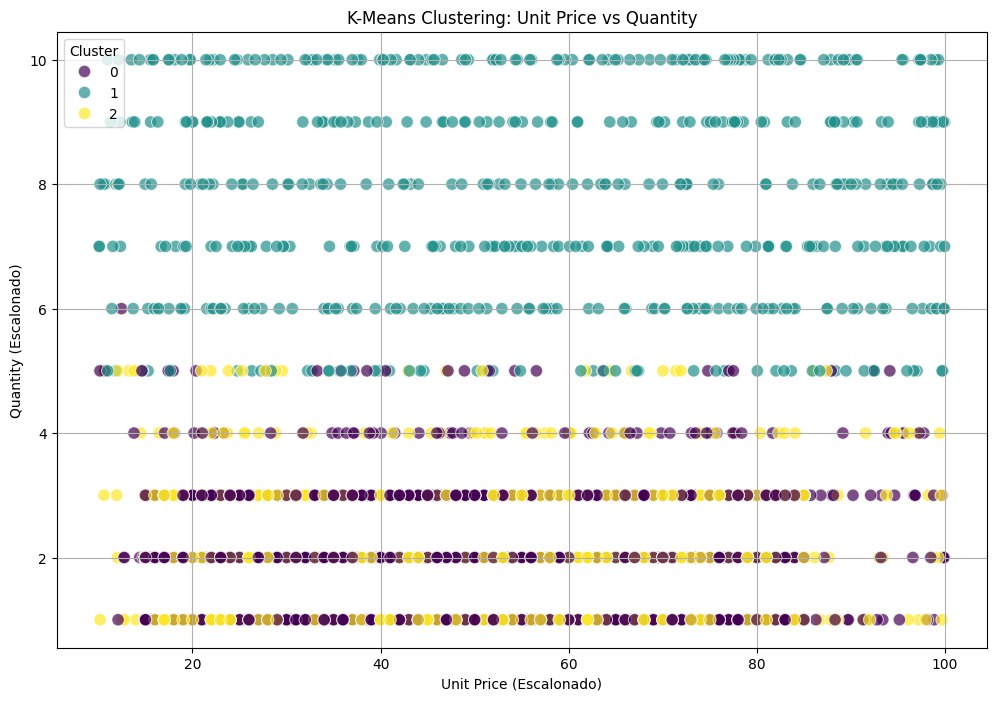

In [23]:
"""Visualização dos clusters"""

plt.figure(figsize=(12, 8))
sns.scatterplot(x='unit_price', y='quantity', hue='Cluster', palette='viridis', data=df_walmart, s=80, alpha=0.7)
plt.title(f'K-Means Clustering: Unit Price vs Quantity')
plt.xlabel('Unit Price (Escalonado)')
plt.ylabel('Quantity (Escalonado)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [24]:
print("\nMédias das características por Cluster:")
print(df_walmart.groupby('Cluster')[['unit_price', 'quantity', 'rating', 'profit_margin']].mean())



Médias das características por Cluster:
         unit_price  quantity    rating  profit_margin
Cluster                                               
0         50.509732  2.039547  5.648999       0.314938
1         56.702011  7.776965  7.095612       0.394278
2         50.018500  2.041207  5.869747       0.482947



## Descobertas com K-Means no Dataset do Walmart

### 📊 Identificação de 3 Perfis de Transações

#### **Cluster 0: Compras de Baixa Quantidade e Margem Padrão**

* **Preço unitário:** Médio
* **Quantidade:** Baixa (\~2 unidades)
* **Avaliação:** Média
* **Margem de lucro:** **Baixa (0.31)**
* **💡 Interpretação:** Compras comuns, com pouca margem de lucro. Pode indicar itens com alta concorrência ou baixo valor agregado.

---

#### **Cluster 1: Compradores de Alto Volume e Alta Satisfação**

* **Preço unitário:** Ligeiramente mais alto
* **Quantidade:** **Muito alta (\~7.78 unidades)**
* **Avaliação:** **Mais alta (7.10)**
* **Margem de lucro:** Média (0.39)
* **💡 Interpretação:** Clientes valiosos — fazem grandes compras e são muito satisfeitos. Podem ser famílias grandes ou compradores atacadistas.

---

#### **Cluster 2: Transações de Alta Margem de Lucro**

* **Preço unitário:** Médio
* **Quantidade:** Baixa (\~2 unidades)
* **Avaliação:** Média
* **Margem de lucro:** **Mais alta (0.48)**
* **💡 Interpretação:** Poucas unidades, mas alta rentabilidade. Possivelmente produtos com maior valor agregado ou de marca própria.

---

## Aplicações para o Walmart

* **Marketing Direcionado:**

  * *Cluster 1:* Programas de fidelidade, combos e promoções.
  * *Cluster 0:* Melhorar margens com produtos mais rentáveis.
  * *Cluster 2:* Promover produtos de alta margem e entender seu desempenho.

* **Otimização de Estoque e Loja:**
  Facilitar acesso a itens comprados em grandes volumes (Cluster 1).

* **Gestão de Produtos:**
  Avaliar quais produtos manter, reformular ou descontinuar.

* **Personalização:**
  Ajustar layout e ofertas com base no tipo de transação, mesmo sem identificar o cliente.

* **Análise de Desempenho:**
  Avaliar filiais com base na atração de clientes de alto valor ou alta margem.



In [25]:
print("--- Incrementação do notebook: Kmeans ---")

--- Incrementação do notebook: Kmeans ---


--- Método do Cotovelo para Determinar o K Ideal ---


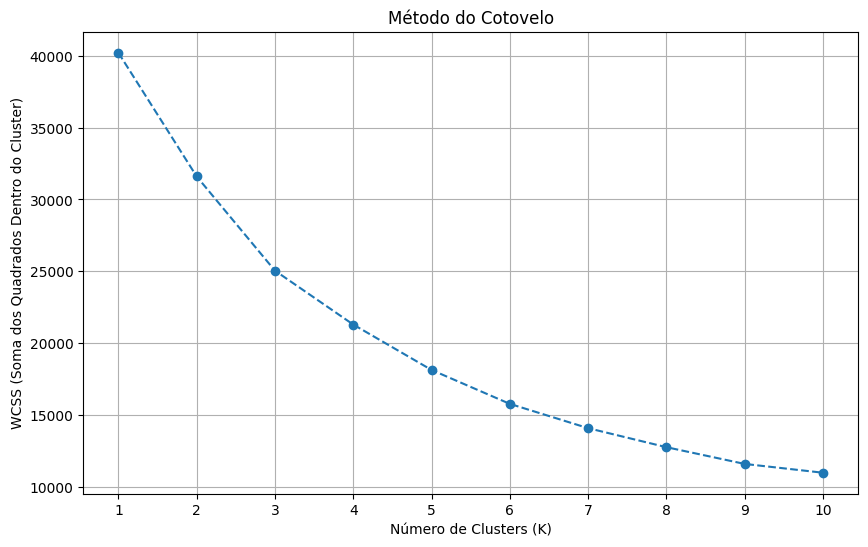


**Interpretação:** Procure um 'cotovelo' no gráfico, onde a diminuição do WCSS começa a se estabilizar. Esse ponto sugere um número ideal de clusters para o seu dado.
Por exemplo, se o cotovelo for em K=3, isso justifica a sua escolha de 3 clusters.


In [26]:
# Célula: Determinando o Número Ideal de Clusters (Método do Cotovelo)

print("--- Método do Cotovelo para Determinar o K Ideal ---")

# Lista para armazenar a soma dos quadrados dentro do cluster (WCSS)
# para diferentes números de clusters.
wcss = []

# Tentaremos diferentes valores de K (por exemplo, de 1 a 10)
# 'X_kmeans_scaled' deve estar disponível das células anteriores do seu notebook
# (ou seja, os dados numéricos escalonados que você usou para o K-Means).
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_elbow.fit(X_kmeans_scaled)
    wcss.append(kmeans_elbow.inertia_) # 'inertia_' é o WCSS

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Soma dos Quadrados Dentro do Cluster)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("\n**Interpretação:** Procure um 'cotovelo' no gráfico, onde a diminuição do WCSS começa a se estabilizar. Esse ponto sugere um número ideal de clusters para o seu dado.")
print("Por exemplo, se o cotovelo for em K=3, isso justifica a sua escolha de 3 clusters.")

In [28]:
# Célula: Re-implementando K-Means com n_clusters = 4

print("--- Implementando K-Means com 4 Clusters ---")

# Definir o número de clusters como 4
n_clusters_new = 4
kmeans_4 = KMeans(n_clusters=n_clusters_new, random_state=42, n_init=10)

# Assumindo que 'X_kmeans_scaled' e 'df_walmart' estão disponíveis das células anteriores.
# Reajustar o modelo K-Means
df_walmart['Cluster_K4'] = kmeans_4.fit_predict(X_kmeans_scaled)

print(f"\nK-Means aplicado com {n_clusters_new} clusters.")
print("\nContagem de pontos em cada novo cluster (K=4):")
print(df_walmart['Cluster_K4'].value_counts())

print("\nPrimeiras 10 linhas do DataFrame com os novos rótulos de cluster (K=4):")
# Ajuste as colunas aqui para as que você usou no K-Means
display(df_walmart[['unit_price', 'quantity', 'rating', 'profit_margin', 'Cluster_K4']].head(10))

--- Implementando K-Means com 4 Clusters ---

K-Means aplicado com 4 clusters.

Contagem de pontos em cada novo cluster (K=4):
Cluster_K4
1    3526
3    3182
0    2825
2     518
Name: count, dtype: int64

Primeiras 10 linhas do DataFrame com os novos rótulos de cluster (K=4):


,unit_price,quantity,rating,profit_margin,Cluster_K4
0,74.69,7.0,9.1,0.48,2
1,15.28,5.0,9.6,0.48,3
2,46.33,7.0,7.4,0.33,2
3,58.22,8.0,8.4,0.33,2
4,86.31,7.0,5.3,0.48,2
5,85.39,7.0,4.1,0.48,2
6,68.84,6.0,5.8,0.33,2
7,73.56,10.0,8.0,0.18,2
8,36.26,2.0,7.2,0.33,3
9,54.84,3.0,5.9,0.33,1


In [29]:
# Analisar as médias das características para os novos 4 clusters
print(f"\n--- Médias das características por Cluster (K={n_clusters_new}) ---")
print(df_walmart.groupby('Cluster_K4')[['unit_price', 'quantity', 'rating', 'profit_margin']].mean())

print("\n--- Fim da implementação K-Means com K=4 ---")


--- Médias das características por Cluster (K=4) ---
            unit_price  quantity    rating  profit_margin
Cluster_K4                                               
0            49.321869  2.028429  4.768496       0.483250
1            50.421170  2.044034  4.765315       0.309223
2            57.692876  7.930502  6.980502       0.392317
3            50.869306  2.074179  7.751194       0.408319

--- Fim da implementação K-Means com K=4 ---


--- Contagem Visual de Membros por Cluster (K=4) ---


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\783234084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_K4', data=df_walmart, palette='viridis') # Usar Cluster_K4


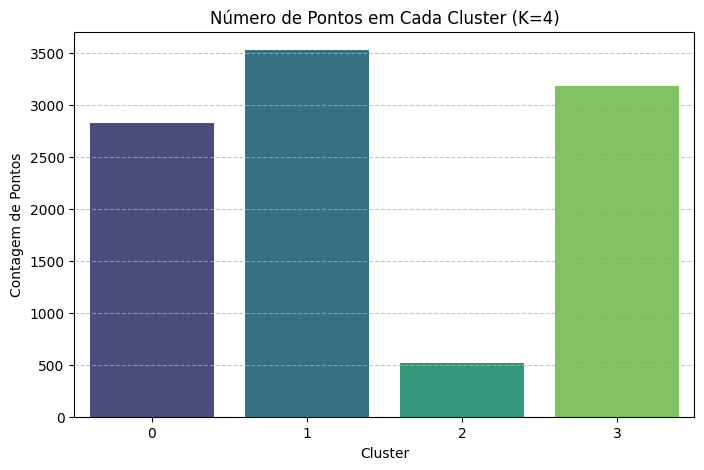


**Interpretação:** Este gráfico mostra visualmente o tamanho relativo de cada um dos 4 clusters. Você pode ver se há grupos muito grandes ou muito pequenos, o que pode impactar a interpretação.


In [ ]:
# Célula: Contagem de Membros por Cluster (Gráfico de Barras, K=4)

print("--- Contagem Visual de Membros por Cluster (K=4) ---")

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster_K4', data=df_walmart, palette='viridis') # Usar Cluster_K4
plt.title('Número de Pontos em Cada Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Pontos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Relatório de Gráfico: Contagem de Membros por Cluster (K=4)**

Este gráfico de barras apresenta a distribuição de pontos de dados entre os 4 clusters identificados pelo algoritmo K-Means.

* **Observação Principal:** É notável que a distribuição dos pontos pelos clusters é **desbalanceada**. Os Clusters 0, 1 e 3 são os maiores, contendo a vasta maioria dos pontos de dados, enquanto o Cluster 2 é significativamente menor.
* **Implicação:** Essa assimetria no tamanho dos clusters sugere que a maioria das transações se encaixa em 3 perfis principais (Clusters 0, 1 e 3), com um menor número de transações representando perfis mais específicos ou nichos (Clusters 2).


--- Pairplot das Características por Cluster (K=4) ---


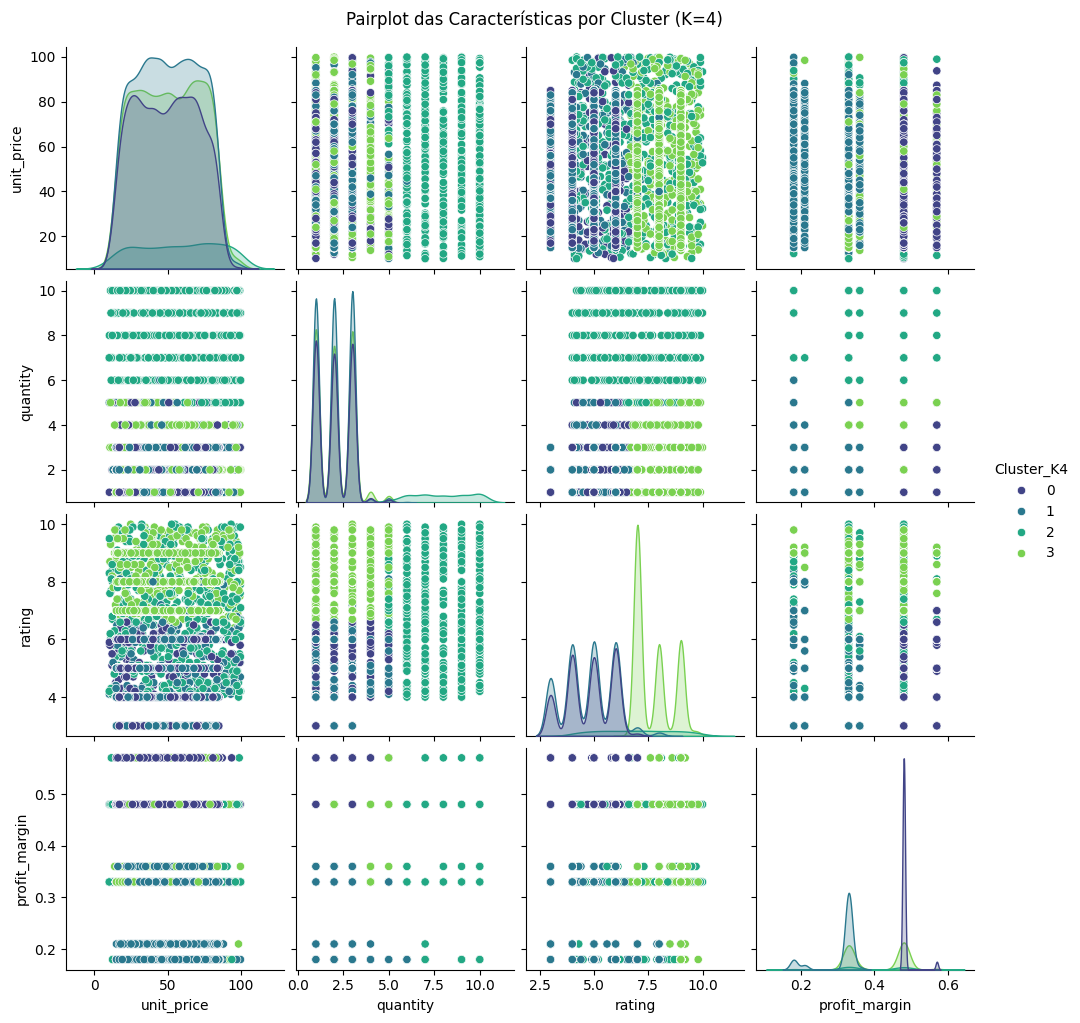


**Interpretação:** Observe como os 4 clusters se separam visualmente em diferentes combinações de características. As cores ajudam a distinguir os grupos. Procure por sobreposições e por separações claras.


In [ ]:
# Célula: Visualização dos Clusters com Pairplot (K=4)

print("--- Pairplot das Características por Cluster (K=4) ---")

# Crie uma cópia do DataFrame com as colunas relevantes e o cluster
df_plot_k4 = df_walmart[numerical_cols_for_kmeans + ['Cluster_K4']].copy()
# convertendo a coluna 'Cluster_K4' para tipo categórico para melhorar na hora do plot
df_plot_k4['Cluster_K4'] = df_plot_k4['Cluster_K4'].astype('category')

sns.pairplot(df_plot_k4, hue='Cluster_K4', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot das Características por Cluster (K=4)', y=1.02) # Título acima dos subplots
print("\n As cores ajudam a distinguir os grupos. Procure por sobreposições e por separações claras.")
plt.show()


#### 🧠 **Principais Insights**:

* **unit\_price** mostra boa separação entre clusters, sugerindo que o preço foi um fator relevante na formação dos grupos.
* **rating** apresenta uma distribuição mais concentrada, mas ainda assim distingue certos clusters com médias mais altas ou mais baixas.
* **profit\_margin** tem variações claras entre os grupos, com alguns clusters concentrados em margens mais baixas ou mais altas.
* **quantity** é mais dispersa, com sobreposição entre clusters, indicando menor poder discriminativo nessa variável.

#### 📌 **Conclusão**:

O modelo de clusterização conseguiu identificar perfis distintos de vendas com base especialmente em `unit_price`, `rating` e `profit_margin`. 

--- Box Plots das Características por Cluster (K=4) ---


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis') # Usar df_plot_k4 e Cluster_K4
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis') # Usar df_plot_k4 e Cluster_K4
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23820\2215438558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_K4'


 variação de uma característica específica em cada um dos 4 clusters.


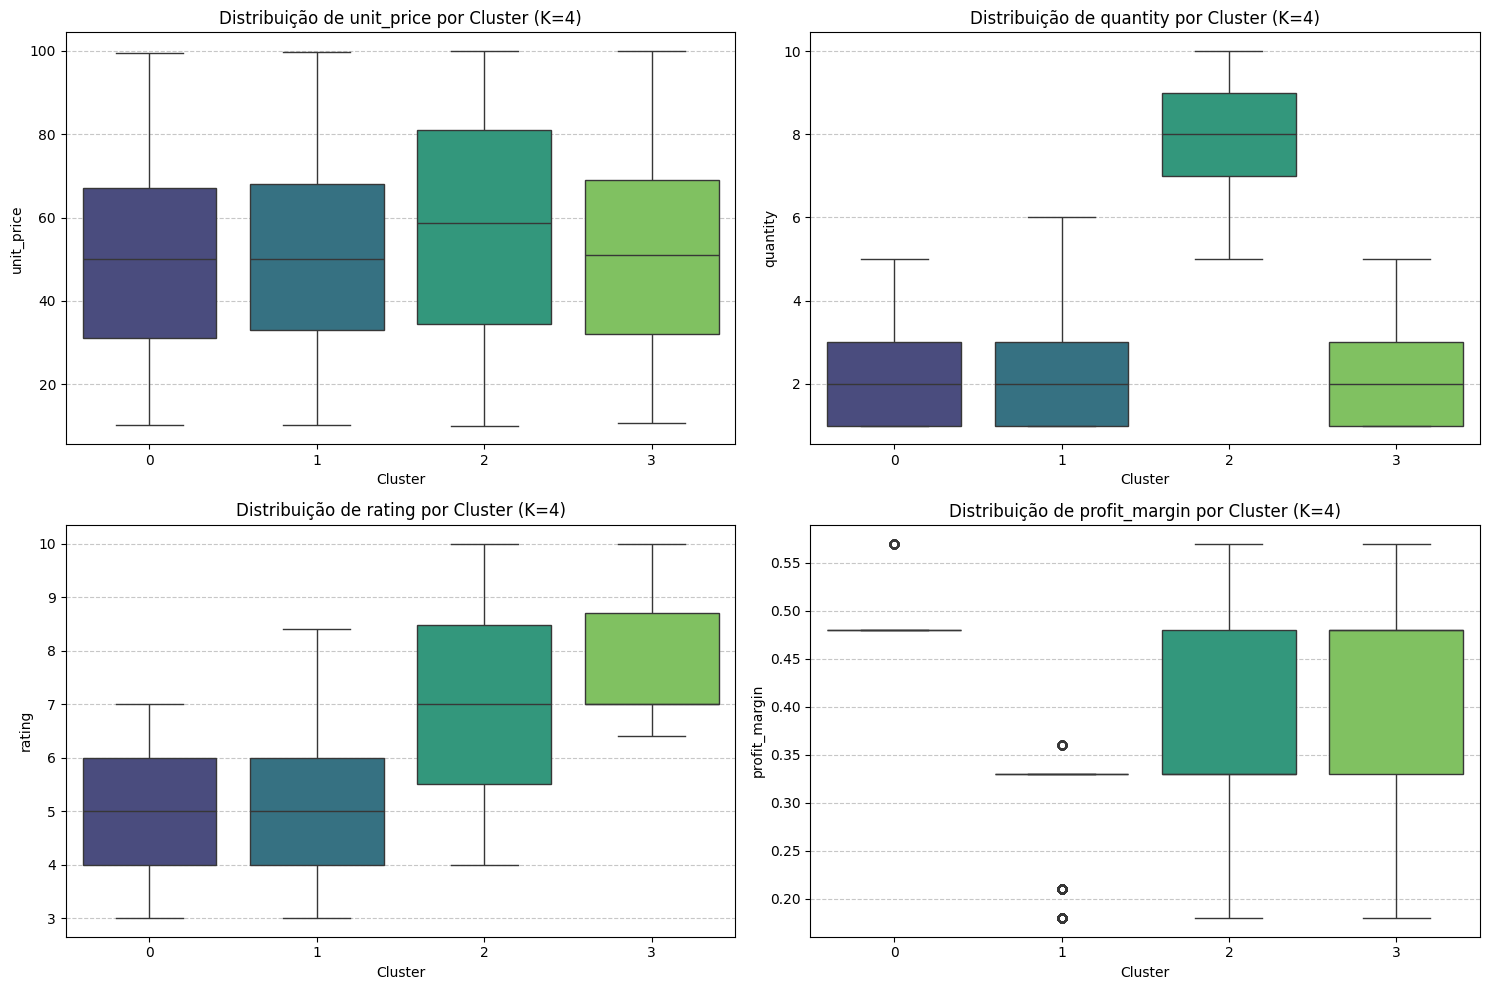

In [ ]:
# Célula: Distribuição das Características por Cluster (Box Plots, K=4)

print("--- Box Plots das Características por Cluster (K=4) ---")

# numerical_cols_for_kmeans --> lista das colunas numéricas
plt.figure(figsize=(15, 10)) # Ajuste o tamanho conforme o número de features

for i, feature in enumerate(numerical_cols_for_kmeans):
    plt.subplot(2, 2, i + 1) # 2, 2 grid para 4 plots
    sns.boxplot(x='Cluster_K4', y=feature, data=df_plot_k4, palette='viridis')
    plt.title(f'Distribuição de {feature} por Cluster (K=4)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Ajustando os subplots para não se sobreporem
print("\n Variação de uma característica específica em cada um dos 4 clusters:")
plt.show()


### **🧠 Insights principais (K=4)**

Este conjunto de gráficos mostra a distribuição das variáveis `unit_price`, `quantity`, `rating` e `profit_margin` para cada um dos **4 clusters identificados** na análise de vendas.

#### 🔍 **Principais Observações por Variável**:

* **unit\_price**:

  * Os quatro clusters possuem faixas semelhantes de preço.
  * O **Cluster 2** tem a maior mediana de preços, enquanto os Clusters 0 e 1 concentram valores mais baixos.

* **quantity**:

  * O **Cluster 2** se destaca com maior quantidade vendida (mediana próxima de 8).
  * Os demais clusters têm quantidades significativamente menores (mediana de 2 ou menos), sugerindo vendas unitárias ou de poucos itens.

* **rating**:

  * O **Cluster 0 e 1** concentram avaliações mais baixas.
  * **Cluster 3** tem as maiores avaliações médias, seguido pelo Cluster 2.

* **profit\_margin**:

  * **Cluster 0** é o mais estável, com alta margem e baixa variabilidade.
  * Clusters 2 e 3 apresentam maior dispersão, mas tendem a margens mais altas.
  * **Cluster 1** concentra as menores margens de lucro.

#### 📌 **Conclusão**:

Os clusters representam **perfis de venda distintos**:

* **Cluster 2**: vendas em maior quantidade, preços e avaliações medianas, margens variadas.
* **Cluster 0**: margens altas, mas vendas unitárias e produtos com avaliações mais baixas (**potencial ponto de atenção**). 
* **Cluster 1**: baixo volume, baixa margem e avaliações baixas (**potencial ponto de atenção**).
* **Cluster 3**: equilíbrio entre avaliação alta e boa margem, embora com menor volume.
